In [82]:
import tensorflow as tf
import matplotlib.pyplot as pit

In [103]:
import random as rd
import pylab as pl

weight=3.4
bias=19.2

y=[]

x=pl.linspace(0,10,50)

for i in x:
    temp = i*weight + bias+rd.randint(-200,200)/50
    y.append(temp)
x=list(x)

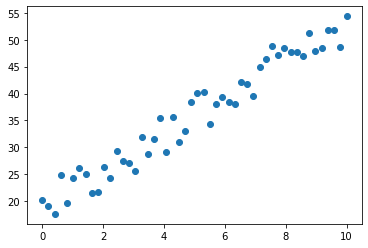

In [104]:
pit.scatter(x,y,label="input data set")

In [105]:
# 선형 모델 클래스 
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(0.)
        self.Bias = tf.Variable(0.)

In [106]:
# 오차(손실) 구하기 함수
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))

In [107]:
# 학습 함수
def train(linear_model, x, y, lr):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

0:: W:1.259495496749878 b:0.21597358584403992 Loss: 1404.4068603515625 


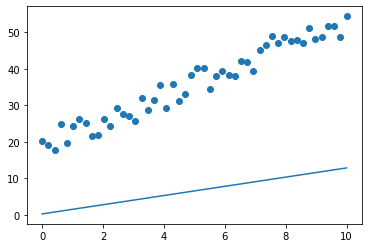

1000:: W:4.0380072593688965 b:14.81799030303955 Loss: 9.35714054107666 


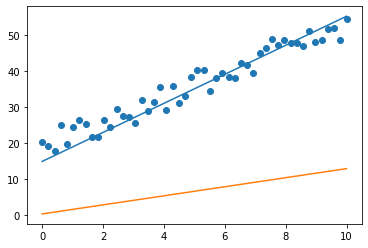

2000:: W:3.580805778503418 b:17.874059677124023 Loss: 5.580482006072998 


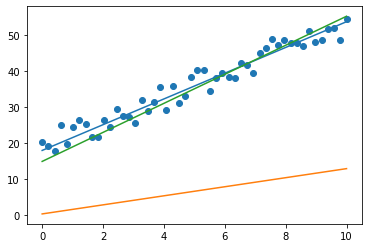

3000:: W:3.480106830596924 b:18.547163009643555 Loss: 5.39727783203125 


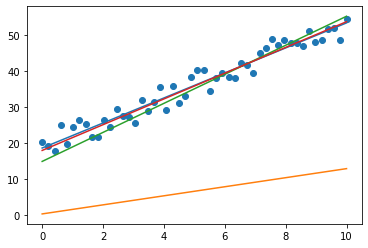

4000:: W:3.457929849624634 b:18.695398330688477 Loss: 5.388393402099609 


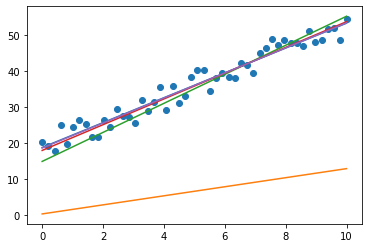

5000:: W:3.453047275543213 b:18.72803497314453 Loss: 5.38796329498291 


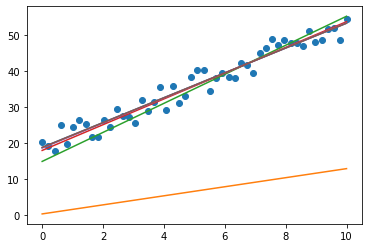

6000:: W:3.4519712924957275 b:18.735233306884766 Loss: 5.387943267822266 


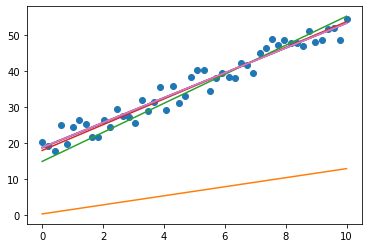

7000:: W:3.4517593383789062 b:18.736644744873047 Loss: 5.387940883636475 


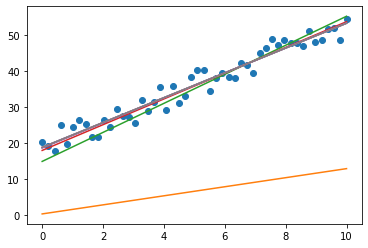

8000:: W:3.4517593383789062 b:18.736644744873047 Loss: 5.387940883636475 


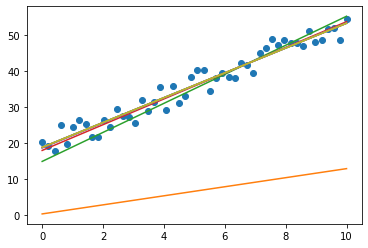

9000:: W:3.4517593383789062 b:18.736644744873047 Loss: 5.387940883636475 


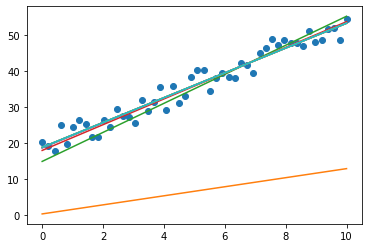

10000:: W:3.4517593383789062 b:18.736644744873047 Loss: 5.387940883636475 


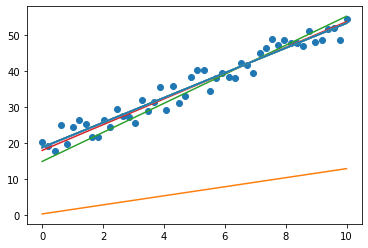

In [108]:
# 학습 진행
linear_model = LinearModel()
epochs = 10000

line=[]

for epoch_count in range(epochs + 1):
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.003)
    
    if epoch_count % 1000 == 0:
        print(f"{epoch_count}:: W:{linear_model.Weight.numpy()} b:{linear_model.Bias.numpy()} Loss: {real_loss.numpy()} ")
        
        tmp_x=[a for a in x]
        tmp_y=[linear_model.Weight.numpy()*b+linear_model.Bias.numpy() for b in x]
        pit.close()
        pit.scatter(x,y,label="input data set")
        pit.plot(tmp_x,tmp_y)
        for i in line:
            pit.plot(i[0],i[1])
        line.append([tmp_x,tmp_y])
        pit.show()